In [39]:
%pip install tensorflow

DEPRECATION: Loading egg at /home/weasel/reps/ai-seizure-detectives/.venv/lib/python3.11/site-packages/lazy_loader-0.3-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/weasel/reps/ai-seizure-detectives/.venv/lib/python3.11/site-packages/mne-0.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [41]:
import pyarrow as pa
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from source import data_import

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [43]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Activation, Dropout 

In [44]:
# load data
df_pp = data_import.load_pyarrow(file_name="feature_extracted")
df_pp.shape

/home/weasel/reps/ai-seizure-detectives/source/../data/feature_extracted.arrow was loaded.


(1138, 73)

In [45]:
df_pp.head()

,seizure_id,segment_id,is_seizure,F4-C4_std,F4-C4_var,F4-C4_mean,F4-C4_abs_mean,F4-C4_delta,F4-C4_theta,F4-C4_gamma,...,FP1-F3_delta,FP1-F3_theta,FP1-F3_gamma,CZ-PZ_std,CZ-PZ_var,CZ-PZ_mean,CZ-PZ_abs_mean,CZ-PZ_delta,CZ-PZ_theta,CZ-PZ_gamma
0,0,1,False,25.278278,638.991344,0.642823,19.767362,99.724544,33.651173,0.131576,...,115.680103,29.233559,0.343249,35.447713,1256.540374,0.758870,27.466555,194.364620,76.886992,0.174189
1,0,2,False,24.908361,620.426452,0.459926,19.018136,80.467433,30.739370,0.113581,...,98.999296,24.519002,0.363930,33.861154,1146.577756,0.040398,24.488472,187.417290,34.401955,0.181605
2,0,3,False,25.078313,628.921793,-0.336786,18.864175,97.815139,19.120020,0.108965,...,76.273119,21.891098,0.347473,30.472674,928.583879,0.139786,23.040842,117.606520,31.998680,0.155509
3,0,4,False,23.796227,566.260437,0.571550,18.298645,78.057846,22.859691,0.112154,...,111.418632,24.584840,0.326450,30.803236,948.839359,0.347514,23.812672,158.377845,31.605055,0.181355
4,0,5,False,28.030262,785.695596,-0.156618,21.895794,102.786435,31.697164,0.123064,...,115.905093,37.751880,0.323275,39.120852,1530.441051,-0.032786,29.786483,215.122132,60.283108,0.170928


In [46]:
# Split data into train and test set for RNN

#train_test_split_ratio = int(len(df)*0.8)
#train_data, test_data = df[:train_test_split_ratio], df[train_test_split_ratio:]

In [47]:
# X_train = train_data.loc[:,channels]
# y_train = train_data['is_seizure']
# X_test = test_data.loc[:,channels]
# y_test = test_data['is_seizure']

In [48]:
X_train.shape

(910, 72)

In [49]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with stratification
model_df= df_pp
y = model_df["is_seizure"]
X = model_df.drop(columns=["is_seizure"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [50]:
X_train.shape[1]

72

In [52]:
# ANN simple
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))  # Input layer with 2 features
model.add(layers.Dense(32, activation='relu'))  # Hidden layer with 32 units and ReLU activation
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with 1 unit and sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#history=model.fit(X_train, y_train, epochs=10, batch_size=32)
history = model.fit(X, y, epochs=300, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X_train)

# Evaluate the model (you can use a separate test dataset)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Epoch 1/300


29/29 [==============================] - 0s 4ms/step - loss: 308.0547 - accuracy: 0.4879 - val_loss: 95.5907 - val_accuracy: 0.5263
Epoch 2/300
29/29 [==============================] - 0s 1ms/step - loss: 122.7693 - accuracy: 0.6022 - val_loss: 70.8627 - val_accuracy: 0.6404
Epoch 3/300
29/29 [==============================] - 0s 1ms/step - loss: 82.8826 - accuracy: 0.6923 - val_loss: 53.6464 - val_accuracy: 0.7368
Epoch 4/300
29/29 [==============================] - 0s 1ms/step - loss: 67.3300 - accuracy: 0.6978 - val_loss: 54.2512 - val_accuracy: 0.8114
Epoch 5/300
29/29 [==============================] - 0s 1ms/step - loss: 49.3004 - accuracy: 0.7692 - val_loss: 47.5129 - val_accuracy: 0.8202
Epoch 6/300
29/29 [==============================] - 0s 1ms/step - loss: 37.7737 - accuracy: 0.7846 - val_loss: 36.7896 - val_accuracy: 0.8246
Epoch 7/300
29/29 [==============================] - 0s 1ms/step - loss: 33.7254 - accuracy: 0.7758 - val_loss: 54.1718 - val_accuracy: 0.8640
Epoch 8/3

In [53]:
# Plotting function for MSE
def plot_metric(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [54]:
history.history[]

SyntaxError: invalid syntax (51475132.py, line 1)

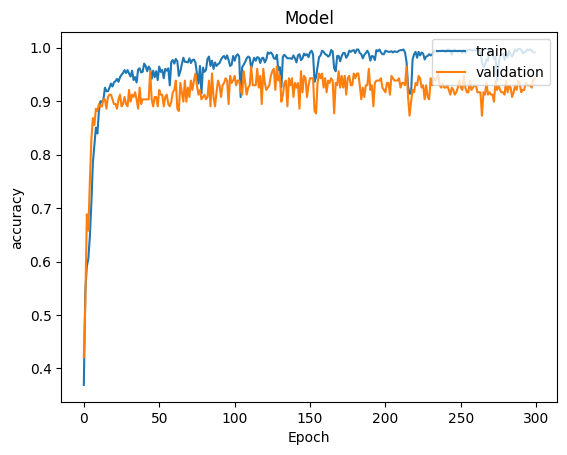

In [ ]:
plot_metric(history)

In [ ]:
# Plotting function for loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model Loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

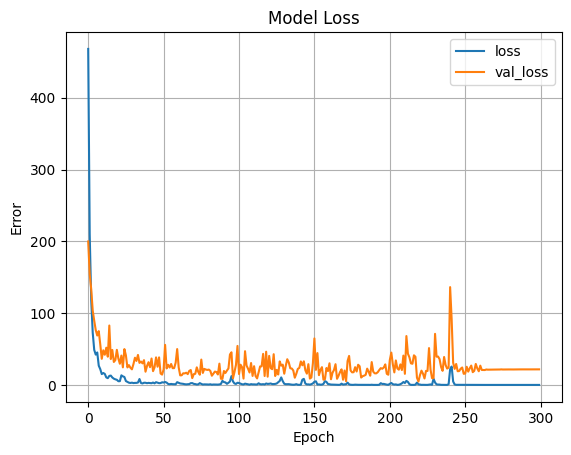

In [ ]:
plot_loss(history)

In [ ]:
X_train.head()

,seizure_id,segment_id,F4-C4_mean,F4-C4_std,F4-C4_var,F4-C4_delta,F4-C4_theta,F4-C4_gamma,F3-C3_mean,F3-C3_std,...,FP1-F3_var,FP1-F3_delta,FP1-F3_theta,FP1-F3_gamma,CZ-PZ_mean,CZ-PZ_std,CZ-PZ_var,CZ-PZ_delta,CZ-PZ_theta,CZ-PZ_gamma
443,25,1,0.974963,135.003426,18225.924931,2797.734571,1957.126647,1.775834,-0.661827,126.268013,...,15380.144604,2100.357990,1733.892792,3.914420,0.865415,94.802843,8987.578971,1028.188675,1162.317346,0.577755
802,41,23,-0.205126,58.548470,3427.923365,411.614580,194.853022,5.660160,0.378357,91.261712,...,6873.815185,956.843979,658.790549,4.424090,0.777484,86.584393,7496.857152,660.079314,677.181647,1.961629
687,36,5,1.005757,47.401366,2246.889471,326.336836,99.152996,0.654710,1.907424,36.907004,...,1159.953288,107.847647,51.422094,0.521944,-1.224023,28.466164,810.322468,68.533874,55.964939,0.404406
984,51,5,0.331929,24.705349,610.354277,93.141078,19.014501,0.527946,0.211552,27.949830,...,1589.581269,214.778474,23.954979,0.635606,0.409745,26.426466,698.358121,122.557711,20.918492,0.234341
1132,59,13,0.539940,33.038943,1091.571736,99.472771,38.743466,6.533105,0.342192,33.253709,...,2812.827758,388.453799,57.652633,7.607802,0.252749,30.347643,920.979444,161.602936,24.461690,0.462372


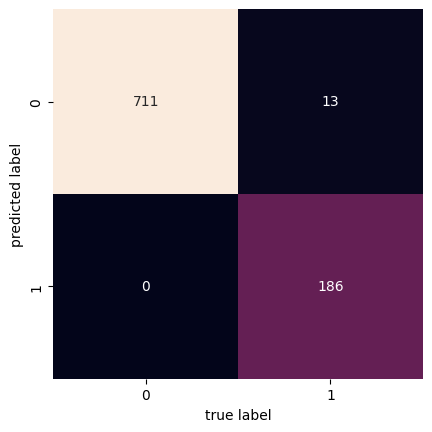

In [ ]:
# Plotting the confusing matrix
mat = confusion_matrix(y_train, predictions.round())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
predictions_test = model.predict(X_test)


8/8 [==============================] - 0s 2ms/step


In [ ]:
# Generate a classification report with various metrics
report = classification_report(y_test, predictions_test.round())
print("Classification Report:")
print(report)
      

Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       178
        True       1.00      0.98      0.99        50

    accuracy                           1.00       228
   macro avg       1.00      0.99      0.99       228
weighted avg       1.00      1.00      1.00       228



In [ ]:
# #RNN - work in progress
# # Define a sequential model
# model = keras.Sequential()

# # Add an input layer with an input shape of (time_steps, input_features)
# model.add(layers.InputLayer(input_shape=(X_train.shape[0], 10)))

# # Add a SimpleRNN layer with 32 units (neurons)
# model.add(layers.SimpleRNN(32, activation='tanh'))

# # Add the output layer with 1 neuron and sigmoid activation for binary classification
# model.add(layers.Dense(1, activation='sigmoid'))

# # Compile the model with binary cross-entropy loss for binary classification
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Assuming X_train and y_train are your training data
# model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


ValueError: in user code:

    File "/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 23274086, 10), found shape=(None, 10)
